<h2><b>Data Science and Business Analytics Intern @ The Sparks Foundation </b></h2>
<h3><b> Task #3: Prediction Using Decision Tree Algorithm </b></h3>


<h3><b>Author: Umadevi Balasubramanian </b></h3>

<b>The aim of this task is to create a Decision Tree classifier and visualize it graphically.</b> 

<b>1. Importing Libraries & Loading the Dataset.</b>

In [1]:
# Importing the Libraries.

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


<b>2. Data Cleaning.</b>

In [5]:
iris.duplicated().sum()

0

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b>No Duplicates, No Non-Null data values. Only the unnecessary column, named 'Id' has to be removed.</b>

In [7]:
iris.drop('Id', axis=1, inplace=True)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<b>Id column is removed. Now, iris DataFrame has 5 columns only.</b>

<b>2. Splitting the data columns, Species(target) column separately. </b>

In [9]:
x = pd.DataFrame(iris, columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
y = iris['Species']

<b>3. Splitting the dataset into Training & Testing data.</b>

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

<b>4. Decision Tree Classifier.</b>

In [11]:
DTModel = DecisionTreeClassifier(random_state=100)

<b>5. Fitting the Trainin data.</b>

In [12]:
DTModel.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

<b>6. Test our model by giving one random Sample data.</b>

In [13]:
s1 = [[4.8, 3.3, 1.6, 0.4]]
s1_pred = DTModel.predict(s1)
print(s1_pred)

['Iris-setosa']


<b> The given values are close to 'Iris-setosa' category. It predicted the class correctly.</b>

In [14]:
s2 = [[5.2, 2.8, 4.8, 1.7]]
s2_pred = DTModel.predict(s2)
print(s2_pred)

['Iris-virginica']


<b>The given values are close to 'Iris-virginica' category. It predicted the class correctly.</b>

In [15]:
s3 = [[6.1, 2.7, 4.0, 1.0]]
s3_pred = DTModel.predict(s3)
print(s3_pred)

['Iris-versicolor']


<b>The given values are close to 'Iris-versicolor' category. Our DT model predicted the right class.</b>

<b>7. Prediction on Testing data.</b>

In [16]:
y_pred = DTModel.predict(x_test)
#print(y_pred)

<b>8. To check the 'Accuracy' of our model (For Test data).</b>

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of our Model is: %0.2f" %acc +"%")

Accuracy of our Model is: 95.56%


In [19]:
cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


<b> Confusion Matrix is a good way to see the model's performance. 
Out of 150 samples, 30% of samples (45) were used for testing.</b>
<b><ol><li>In confusion matrix, position (0,0), we have 16. That means, 16 flowers of category-1 ('Iris-setosa') 
           were predicted correct.</li>
       <li>In position (1,1), we have 10. that means, 10 flowers of category-2 ('Iris-versicolor')were predicted correct.</li>
    <li>In position (2,2), we have 17. That means, 17 flowers of category-3 ('Iris-virginica') were predicted correct.</li>
    <li> So totally (16 + 10 + 17) = 43 flowers were predicted correctly. Only 2 wrong predictions.</li></ol></b>

<b>9. Plotting the Decision Tree in Decision Making.</b>

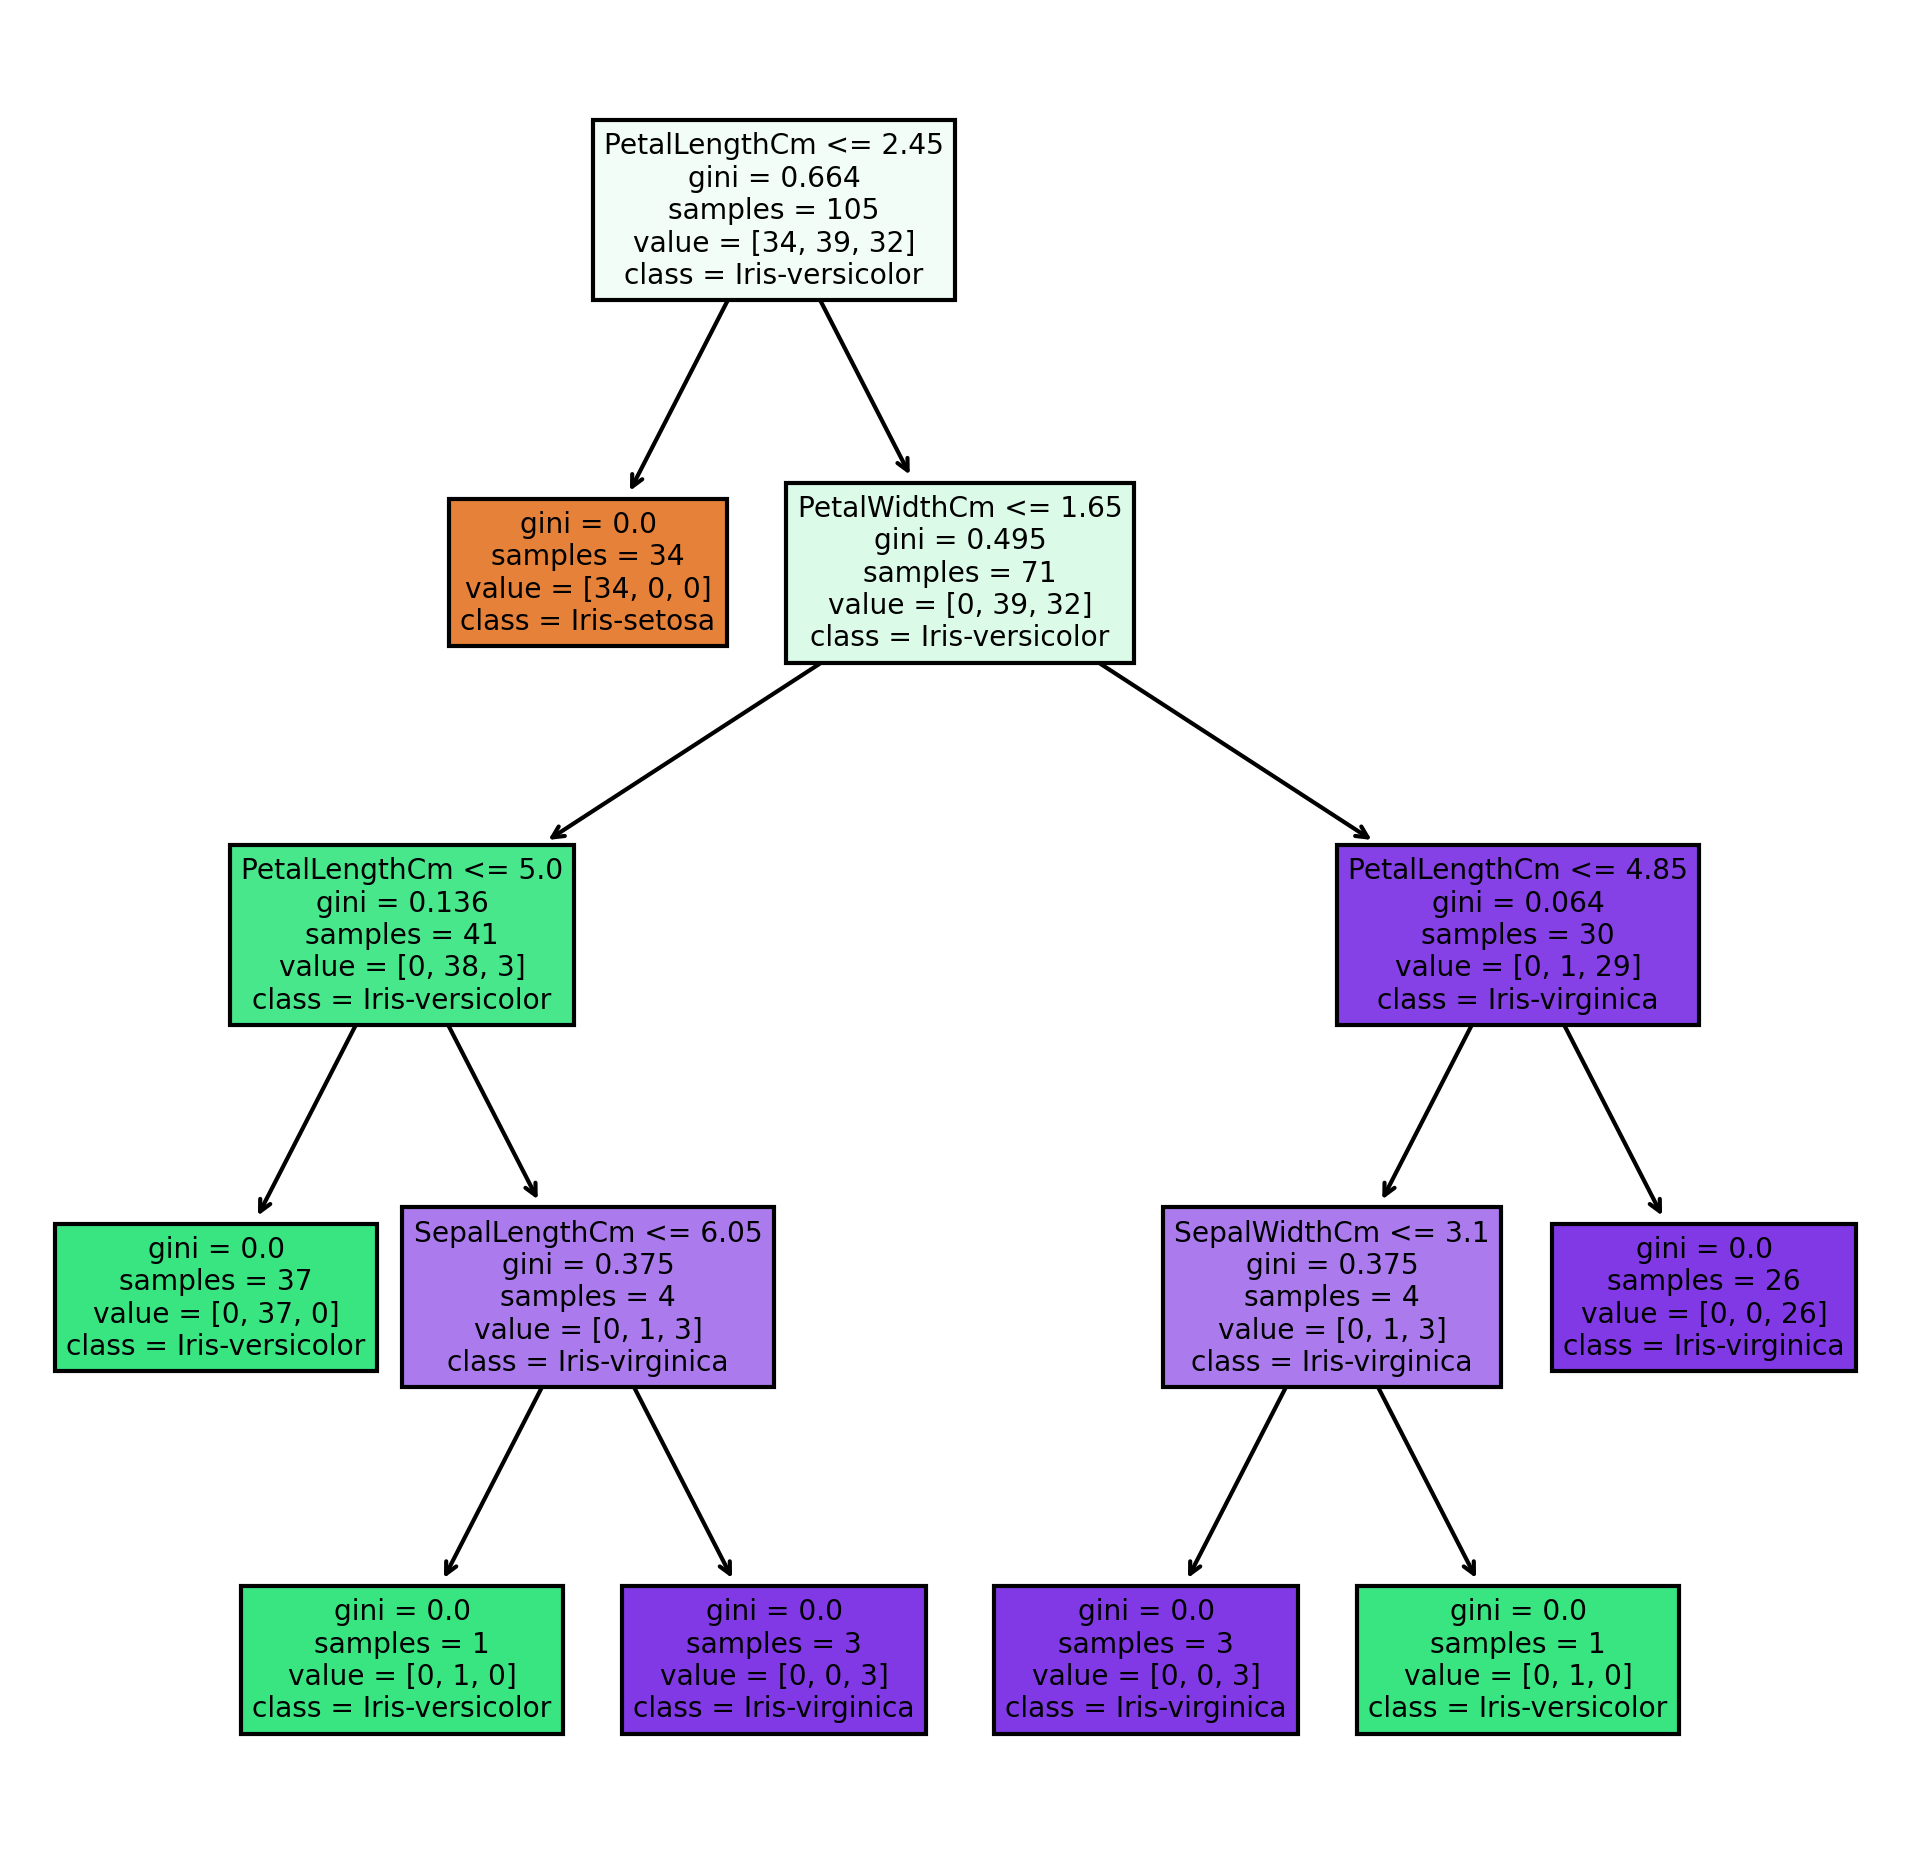

In [20]:
import sklearn.tree
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), dpi=300)
tree.plot_tree(DTModel, filled=True, feature_names=x.columns, class_names=iris.Species.unique())
plt.show()

<b>10. Printing the Decision Tree in TEXT format.</b>

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import export_text
text_form = tree.export_text(DTModel)
print(text_form)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



<b> Decision Tree Classifier is created, Visualized and tested for some sample data for each of the 3 
('Iris-setosa', 'Iris-versicolor' & 'Iris-virginica') categories of the flower. And our DT model has predicted the right class.</b>